In [1]:
import pandas as pd 

data = pd.read_csv('spam.csv',encoding = 'latin1')
df = pd.DataFrame(data)
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

In [2]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
df = df.rename(columns={'v1':'target','v2':'message'})
print(df.head())

  target                                            message
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
 df.isnull().sum()

target     0
message    0
dtype: int64

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(subset=['message'])
df.head(10)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [8]:
df.value_counts('target')

target
0    4516
1     653
dtype: int64

([<matplotlib.patches.Wedge at 0x1cbc5d1d988>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

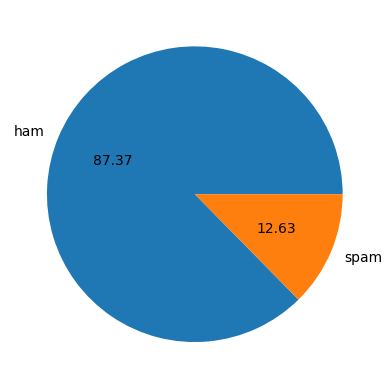

In [9]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [10]:
df['num_char'] = df['message'].apply(len)
df.head(10)

,target,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [11]:
import nltk
df['num_words'] = df['message'].apply(lambda x: nltk.word_tokenize(x)).apply(len)
df.head(10)

,target,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [12]:
df['num_sent'] = df['message'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)
df.head(10)

,target,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [13]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

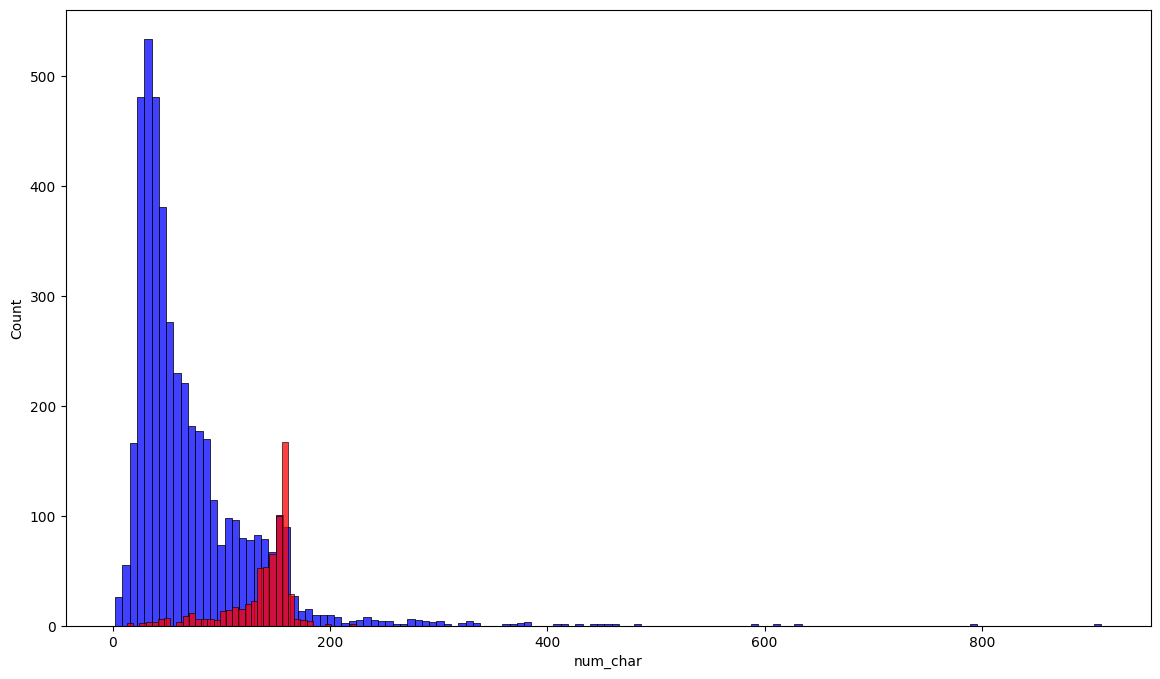

In [16]:
import seaborn as sns

# histogram with column named "num_char"

plt.figure(figsize=(14, 8))
sns.histplot(df[df['target'] == 0]['num_char'],color = 'blue')
sns.histplot(df[df['target'] == 1]['num_char'],color = 'red')



<AxesSubplot:xlabel='num_words', ylabel='Count'>

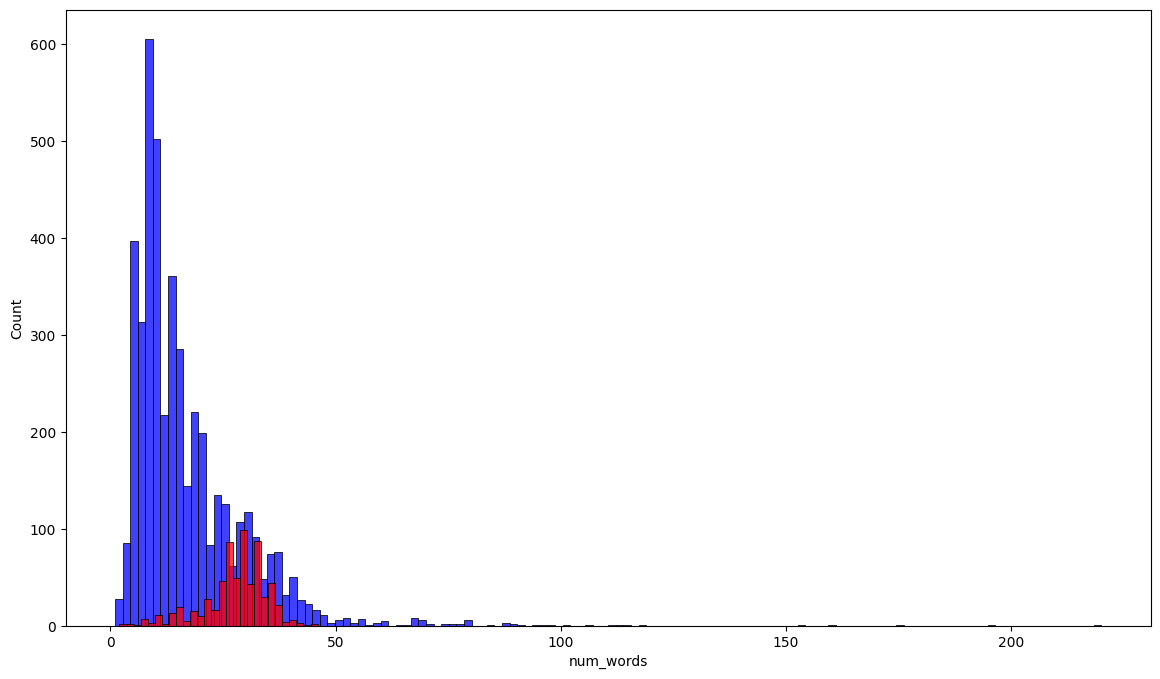

In [17]:
# histogram with column named "num_word"

plt.figure(figsize=(14,8))
sns.histplot(df[df['target']==0]['num_words'], color='blue')
sns.histplot(df[df['target']==1]['num_words'],color='red')


<AxesSubplot:xlabel='num_sent', ylabel='Count'>

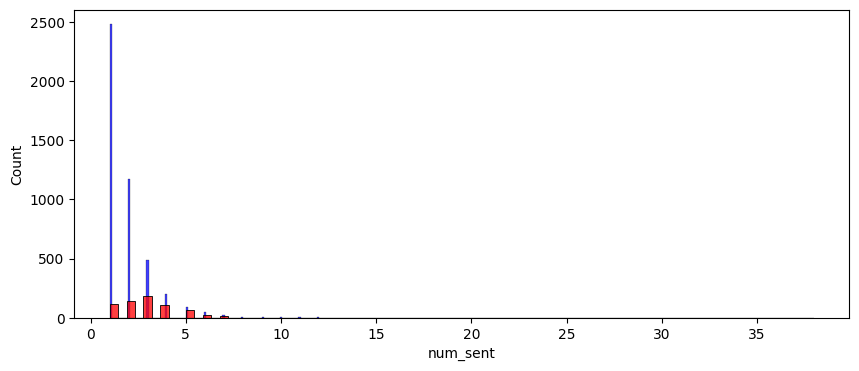

In [18]:
# histogram with column named "num_sent"

plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_sent'],color='blue')
sns.histplot(df[df['target']==1]['num_sent'],color='red')


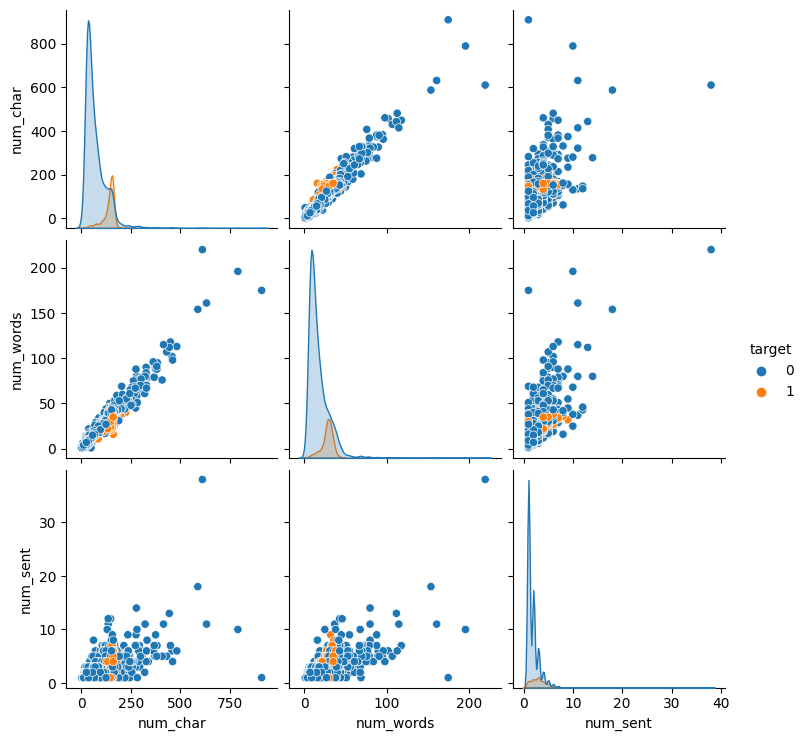

In [19]:
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

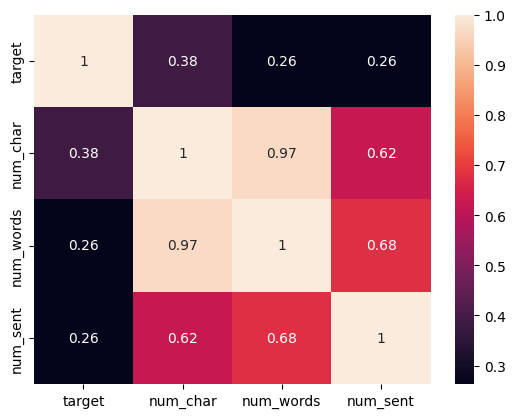

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
# DATA OR TEXT PREPROCESSING :-

# CONVERT TO LOWER CASE 
#TOKENIZATION
#REMOVAL OF SPECIAL CHARACTERS
#REMOVAL OF STOPWORDS AND PUNCTUATIONS 
#STEMMING

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string


def process_data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    ps = PorterStemmer()
    
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
            
            
    return " ".join(y)
            


In [23]:
df['transformed_text'] = df['message'].apply(process_data)
df.head(10)   

,target,message,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


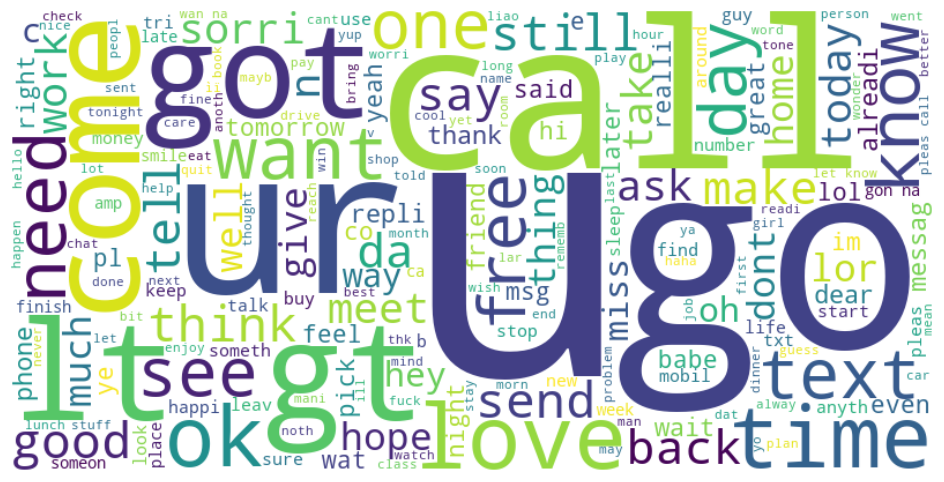

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['transformed_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9738878143133463
Confusion Matrix:
 [[872  17]
 [ 10 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['message']).toarray()
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability = True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9864603481624759
Confusion Matrix:
 [[886   3]
 [ 11 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.98      0.92      0.95       145

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9796905222437138
Confusion Matrix:
 [[888   1]
 [ 20 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.86      0.92       145

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [31]:
y_prob = svc.predict_proba(X_test)[:, 1]

# Change threshold from 0.5 to 0.3 for example
y_pred_thresh = (y_prob >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[880   9]
 [  8 137]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.94      0.94      0.94       145

    accuracy                           0.98      1034
   macro avg       0.96      0.97      0.97      1034
weighted avg       0.98      0.98      0.98      1034



In [32]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97678916827853
Confusion Matrix:
 [[889   0]
 [ 24 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [33]:
y_prob = mnb.predict_proba(X_test)[:, 1]

# Change threshold from 0.5 to 0.3 for example
y_pred_thresh = (y_prob >= 0.3).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[889   0]
 [ 18 127]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

